# Practice notebook for hypothesis tests using NHANES data

This notebook will give you the opportunity to perform some hypothesis tests with the NHANES data that are similar to
what was done in the week 3 case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [213]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
import scipy.stats as stats
sns.set_theme(rc={'figure.dpi':90})
da = pd.read_csv("nhanes_2015_2016.csv")

## Question 1

Conduct a hypothesis test (at the 0.05 level) for the null hypothesis that the proportion of women who smoke is equal to the proportion of men who smoke.

**Step 1: Define hypothesis**
- Population: female smokers and male smokers
- Parameter of Interest: p_women_smoker - p_men_smoker
- H0: p_women_smoker = p_men_smoker
- Ha: p_women_smoker ≠ p_men_smoker

**Step 2: Inference Approach**
- Perform 2-tailed z-test to test because we have categorical variables (smoking status) in this case.

**Step 3: Check Assumption** 
- Normal distribution
- Large samples size
- Two samples are independent

In [15]:
da_filtered = da[da['SMQ020'].isin([1,2])]

da_filtered['SMQ020'].value_counts()

2    3406
1    2319
Name: SMQ020, dtype: int64

In [23]:
# Split by gender
female = da_filtered[(da_filtered['RIAGENDR'] == 2)]
male = da_filtered[(da_filtered['RIAGENDR'] == 1)]

# calculate n
n_female_smoker = len(female[female['SMQ020']==1]['SMQ020'])
n_female = len(female)
n_male_smoker = len(male[male['SMQ020'] == 1]) 
n_male = len(male)

# Perform two proportion z-test
z_stat, p_value = sm.stats.proportions_ztest([n_female_smoker, n_male_smoker], [n_female, n_male])
# Print results
print("Difference of Proportions Z-Test")
print("Z-statistic:", z_stat)
print("P-value:", p_value)

Difference of Proportions Z-Test
Z-statistic: -16.049719603652488
P-value: 5.742288777302776e-58


__Q1a.__ Write 1-2 sentences explaining the substance of your findings to someone who does not know anything about statistical hypothesis tests.

> The findings indicate a significant difference between the proportion of women who smoke and the proportion of men who smoke. The extremely low p-value suggests that the observed difference in proportions is unlikely to occur by chance alone, providing strong evidence to **reject the null hypothesis and support the alternative hypothesis that the proportions of female smokers and male smokers are not equal.**

__Q1b.__ Construct three 95% confidence intervals: one for the proportion of women who smoke, one for the proportion of men who smoke, and one for the difference in the rates of smoking between women and men.

In [51]:
# Proportion for women and men who smoke and difference in smoking rates (Women - Men)
p_female = n_female_smoker / n_female
p_male = n_male_smoker / n_male
p_diff = p_female - p_male

# Standard error for proportion of women who smoke, men who smoke and difference in smoking rates (Women - Men)
se_female_smoker = np.sqrt((p_female * (1 - p_female)) / n_female)
se_male_smoker = np.sqrt((p_male * (1 - p_male)) / n_male)
se_diff = np.sqrt(se_female_smoker**2 + se_male_smoker**2)

#### Using formula

In [54]:
# Confidence interval for proportion of women who smoke
ci_female_smoker = (n_female_smoker / n_female) - 1.96 * se_female_smoker, (n_female_smoker / n_female) + 1.96 * se_female_smoker 

# Confidence interval for proportion of men who smoke
ci_male_smoker = (n_male_smoker / n_male) - 1.96 * se_male_smoker, (n_male_smoker / n_male) + 1.96 * se_male_smoker

# Confidence interval for the difference in smoking rates (Women - Men)
ci_diff_smoking_rates = p_diff - 1.96 * se_diff, p_diff + 1.96 * se_diff

# Print the confidence intervals
print(f"95% Confidence Interval for Proportion of Women who Smoke:{ci_female_smoker}")
print(f"95% Confidence Interval for Proportion of Men who Smoke: {ci_male_smoker}")
print("95% Confidence Interval for Difference in Smoking Rates (Women - Men):", ci_diff_smoking_rates)

95% Confidence Interval for Proportion of Women who Smoke:(0.288294683866098, 0.32139576027925865)
95% Confidence Interval for Proportion of Men who Smoke: (0.49458714955108174, 0.531929377873546)
95% Confidence Interval for Difference in Smoking Rates (Women - Men): (-0.2333636091471941, -0.18346247413207697)


#### Using Statmodels library

In [55]:
# Confidence interval for proportion of women who smoke
ci_female_smoker = sm.stats.proportion_confint(n_female_smoker, n_female, alpha=0.05)

# Confidence interval for proportion of men who smoke
ci_male_smoker = sm.stats.proportion_confint(n_male_smoker, n_male, alpha=0.05)

# Confidence interval for the difference in smoking rates (Women - Men)
ci_diff = sm.stats.confint_proportions_2indep(n_female_smoker, n_female, n_male_smoker, n_male, compare='diff', alpha=0.05)

# Print the confidence intervals
print("95% Confidence Interval for Proportion of Women who Smoke:", ci_female_smoker)
print("95% Confidence Interval for Proportion of Men who Smoke:", ci_male_smoker)
print("95% Confidence Interval for Difference in Smoking Rates (Women - Men):", ci_diff)

95% Confidence Interval for Proportion of Women who Smoke: (0.2882949879861214, 0.32139545615923526)
95% Confidence Interval for Proportion of Men who Smoke: (0.49458749263718593, 0.5319290347874418)
95% Confidence Interval for Difference in Smoking Rates (Women - Men): (-0.23316728428702627, -0.18329691308756202)


#### Using Scipy.stats library

In [57]:
import scipy.stats as stats

# 95% Confidence interval for the proportion of women who smoke
ci_female_smoker = stats.norm.interval(0.95, loc=p_female_smoker, scale=se_female_smoker)

# 95% Confidence interval for the proportion of men who smoke
ci_male_smoker = stats.norm.interval(0.95, loc=p_male_smoker, scale=se_male_smoker)

# 95% Confidence interval for the difference in smoking rates (Women - Men)
ci_diff = stats.norm.interval(0.95, loc=p_diff, scale=se_diff)

# Print the confidence intervals
print("95% Confidence Interval for Proportion of Women who Smoke:", ci_female_smoker)
print("95% Confidence Interval for Proportion of Men who Smoke:", ci_male_smoker)
print("95% Confidence Interval for Difference in Smoking Rates (Women - Men):", ci_diff)

95% Confidence Interval for Proportion of Women who Smoke: (0.28829498798612146, 0.3213954561592352)
95% Confidence Interval for Proportion of Men who Smoke: (0.49458749263718593, 0.5319290347874418)
95% Confidence Interval for Difference in Smoking Rates (Women - Men): (-0.2333631506746611, -0.18346293260460997)


__Q1c.__ Comment on any ways in which the confidence intervals that you found in part b reinforce, contradict, or add support to the hypothesis test conducted in part a.

>The confidence intervals provide additional information that reinforces the hypothesis test conducted in part a. 
>
>In the hypothesis test, we obtained a very small p-value, suggesting strong evidence against the null hypothesis of equal proportions of women and men who smoke. This indicates that the proportion of women who smoke is significantly different from the proportion of men who smoke.
>
>In the confidence intervals, we observe that the confidence interval for the proportion of women who smoke does not overlap with the confidence interval for the proportion of men who smoke. Additionally, the confidence interval for the difference in smoking rates (women - men) does not include zero. These findings further support the conclusion from the hypothesis test that the smoking rates between women and men are significantly different.
>
>Therefore, both the hypothesis test and the confidence intervals provide consistent evidence that the proportion of women who smoke is not equal to the proportion of men who smoke.

## Question 2

Partition the population into two groups based on whether a person has graduated college or not, using the educational attainment variable [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2).  Then conduct a test of the null hypothesis that the average heights [BMXHT] (in centimeters) of the two groups are equal.  Next, convert the heights from centimeters to inches, and conduct a test of the null hypothesis that the average heights (in inches) of the two groups are equal.

**Step 1: Define hypothesis**
- Population: NHANES sample
- Parameter of Interest: (average heights of college graduates vs. non-college graduates)
- H0: p_college_grad = p_others
- Ha: p_college_grad ≠ p_others

**Step 2: Inference Approach**
- Perform 2-tailed t-test to test because we are comparing the means of two groups (numerical data).

**Step 3: Check Assumption** 
- Normal distribution
- Large samples size
- Two samples are independent

In [87]:
# Partition the population into two groups college graduates and others
da_filtered = da[da['DMDEDUC2'] != 9]

college_grad = da_filtered[da_filtered['DMDEDUC2'] == 5]
others = da_filtered[da_filtered['DMDEDUC2'] != 5]

print(college_grad['BMXHT'].isnull().sum())
print(others['BMXHT'].isnull().sum())

11
51


In [100]:
# Dropping missing values
heights_college_grad = college_grad['BMXHT'].dropna()
heights_others = others['BMXHT'].dropna()

#### Using formula

In [107]:
# Dropping missing values
mean_diff = heights_college_grad.mean() - heights_others.mean()

std_error = np.sqrt(heights_college_grad.std()**2/len(heights_college_grad) + heights_others.std()**2/len(heights_others))

t_stat = (mean_diff - 0) / std_error

# Calculate p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=(len(heights_college_grad) + len(heights_others) - 2)))

# Print results
print("Difference of Means Test between average height of college grads and non college grads")
print("T-statistic:", t_stat)
print("P-value:", p_value)


Difference of Means Test between college graduates and others
T-statistic: 7.3565331228912685
P-value: 2.156053113822054e-13


#### Using SciPy library

In [95]:
from scipy.stats import ttest_ind

# Perform independent samples t-test
t_stat, p_value = ttest_ind(heights_college_grad, heights_others)

# Print results
print("Difference of Means Test between average height of college grads and non college grads")
print("T-statistic:", t_stat)
print("P-value:", p_value)

Difference of Means Test between college graduates and others
T-statistic: 7.191583460970609
P-value: 7.233756536545382e-13


#### Using Statmodels library

In [92]:
# Perform independent samples t-test after dropping missing values
t_stat, p_value, dof = sm.stats.ttest_ind(heights_college_grad, heights_others)

# Print results
print("Difference of Means Test between average height of college grads and non college grads")
print("T-statistic:", t_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)

Difference of Means Test between college graduates and others
T-statistic: 7.191583460970609
P-value: 7.233756536545382e-13
Degrees of Freedom: 5668.0


__Q2a.__ Based on the analysis performed here, are you confident that people who graduated from college have a different average height compared to people who did not graduate from college?

> Based on the analysis performed, the t-statistic of 7.191583460970609 and the very low p-value of 7.233756536545382e-13 indicate strong evidence against the null hypothesis. Therefore, we have evidence to be confident that there is a significant difference in the average height between people who graduated from college and those who did not graduate from college. 

__Q2b:__ How do the results obtained using the heights expressed in inches compare to the results obtained using the heights expressed in centimeters?

In [108]:
# Calculate in inches

# Perform independent samples t-test
t_stat, p_value = ttest_ind(heights_college_grad/2.54, heights_others/2.54)

# Print results
print("Difference of Means Test between average height of college grads and non college grads in inches")
print("T-statistic:", t_stat)
print("P-value:", p_value)

Difference of Means Test between college graduates and others
T-statistic: 7.191583460970738
P-value: 7.233756536538601e-13


>Comparing these results to the previous results obtained using heights expressed in centimeters, we can see that the t-statistic remains the same. However, the p-value is slightly different. This difference may be due to rounding or precision differences when converting the heights between inches and centimeters.
>
>Overall, both analyses indicate a significant difference in average height between college graduates and non-graduates, regardless of whether the heights are expressed in inches or centimeters.

## Question 3

Conduct a hypothesis test of the null hypothesis that the average BMI for men between 30 and 40 is equal to the average BMI for men between 50 and 60.  Then carry out this test again after log transforming the BMI values.

**Step 1: Define hypothesis**
- Population: NHANES men samples
- Parameter of Interest: (average BMI for men between 30 and 40 vs average BMI for men between 50 and 60)
- H0: men_3040_avg_bmi = men_5060_avg_bmi
- Ha: men_3040_avg_bmi ≠ men_5060_avg_bmi

**Step 2: Inference Approach**
- Perform 2-tailed t-test to test because we are comparing the means of two groups (numerical data).

**Step 3: Check Assumption** 
- Normal distribution
- Large samples size
- Two samples are independent

In [115]:
men_3040_bmi = da[(da['RIAGENDR'] == 1) & (da['RIDAGEYR'] >= 30) & (da['RIDAGEYR'] <= 40)]['BMXBMI'].dropna()
men_5060_bmi = da[(da['RIAGENDR'] == 1) & (da['RIDAGEYR'] >= 50) & (da['RIDAGEYR'] <= 60)]['BMXBMI'].dropna()

print(men_3040_bmi.isnull().sum())
print(men_5060_bmi.isnull().sum())

0
0


In [118]:
# Perform independent samples t-test
t_stat, p_value = stats.ttest_ind(men_3040_bmi, men_5060_bmi)

# Print results
print("Difference of Means Test between average BMI for 30-40 men and 50-60 men")
print("T-statistic:", t_stat)
print("P-value:", p_value)

Difference of Means Test between average BMI for 30-40 men and 50-60 men
T-statistic: 0.8984008016755222
P-value: 0.36919303123271296


>Based on the analysis performed, the t-statistic is 0.8984008016755222 and the p-value is 0.36919303123271296. 
>
>With a p-value greater than the significance level of 0.05, we fail to reject the null hypothesis. Therefore, we do not have sufficient evidence to conclude that there is a significant difference in the average BMI between men aged 30-40 and men aged 50-60. 
>
>In other words, there is no significant evidence to suggest that the average BMI of these two age groups is different.

__Q3a.__ How would you characterize the evidence that mean BMI differs between these age bands, and how would you characterize the evidence that mean log BMI differs between these age bands?

#### Mean BMI differs

In [162]:
# The dataset has the min age at 17 and max age at 80 so I split into groups from 17 to 80
da['agegroup'] = pd.cut(da['RIDAGEYR'], [17,20,30,40,50,60,70,80])
mean_bmi_by_agegroup = da.groupby('agegroup').agg({'BMXBMI': ['mean', 'std', 'count']})

# Define the significance level
alpha = 0.05

# Calculate the confidence intervals for each age band
confidence_intervals = []
for _, row in mean_bmi_by_agegroup.iterrows():
    mean_bmi = row[('BMXBMI', 'mean')]
    std_bmi = row[('BMXBMI', 'std')]
    count_bmi = row[('BMXBMI', 'count')]
    se = std_bmi / np.sqrt(count_bmi)
    margin_of_error = se * stats.t.ppf(1 - alpha / 2, count_bmi - 1)
    confidence_interval = (round(mean_bmi - margin_of_error, 4), round(mean_bmi + margin_of_error, 4))
    confidence_intervals.append(confidence_interval)

# Create a new DataFrame for the results
mean_bmi_df = pd.DataFrame({
    'Mean BMI': mean_bmi_by_agegroup[('BMXBMI', 'mean')],
    'Confidence Interval': confidence_intervals
})

# Rearrange the columns
mean_bmi_df = mean_bmi_df[['Mean BMI', 'Confidence Interval']]
mean_bmi_df 

,Mean BMI,Confidence Interval
agegroup,,
"(17, 20]",26.328358,"(25.5773, 27.0794)"
"(20, 30]",28.099573,"(27.6305, 28.5686)"
"(30, 40]",29.975244,"(29.4879, 30.4626)"
"(40, 50]",30.522768,"(30.0368, 31.0088)"
"(50, 60]",30.000000,"(29.5562, 30.4438)"
"(60, 70]",30.244380,"(29.7848, 30.704)"
"(70, 80]",28.557629,"(28.1599, 28.9554)"


> The evidence strongly suggests that there are differences in mean BMI between the age bands. The mean BMI values vary notably across the age groups, ranging from approximately 26.3 in the (17, 20] age band to around 30.5 in the (40, 50] age band. Furthermore, the confidence intervals for the mean BMI values do not overlap for certain pairs of age bands, indicating statistically significant differences in mean BMI between these groups.
>
>Since there are multiple age bands involved, conducting a t-test is not appropriate in this case. To formally assess the differences in mean BMI between the age bands, an analysis of variance (ANOVA) can be employed, allowing for the simultaneous comparison of mean BMI across multiple age groups. However, ANOVA has not been covered in this course yet.
>
>Therefore, based on the available descriptive statistics, there is compelling evidence of variations in mean BMI between the age bands. However, to establish the statistical significance of these differences, further analysis using methods like ANOVA would be required.

#### Mean log BMI differ

In [165]:
# The dataset has the min age at 17 and max age at 80, so I split into groups from 17 to 80
da['agegroup'] = pd.cut(da['RIDAGEYR'], [17, 20, 30, 40, 50, 60, 70, 80])

# Calculate the logarithm (base e) of the BMI values for each age band
da['log_BMXBMI'] = np.log(da['BMXBMI'])

# Group the log BMI values by age band and calculate the mean, standard deviation, and count for each group
mean_log_bmi_by_agegroup = da.groupby('agegroup').agg({'log_BMXBMI': ['mean']})
mean_log_bmi_by_agegroup

,log_BMXBMI
,mean
agegroup,
"(17, 20]",3.239715
"(20, 30]",3.305326
"(30, 40]",3.371574
"(40, 50]",3.391113
"(50, 60]",3.377209
"(60, 70]",3.385506
"(70, 80]",3.332905


In [167]:
# Using ANOVA to test if mean log BMI differs between these age bands

from statsmodels.formula.api import ols
model = ols('log_BMXBMI ~ C(agegroup)', data=da).fit()
anova_table = sm.stats.anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(agegroup),6.0,9.816164,1.636027,32.313707,1.806192e-38
Residual,5655.0,286.309903,0.050630,NaN,NaN


>Based on the ANOVA results, the p-value for the age group factor is very small (approximately 1.806192e-38), indicating strong evidence of a significant difference in mean log BMI between the age bands.
>
>The F-statistic is 32.313707, and the corresponding p-value is very small. This suggests that the variability in the log BMI values between the age bands is larger than the variability within the age bands.
>
>Therefore, we can conclude that there is strong evidence to suggest that the mean log BMI differs significantly between the age bands. The age group variable appears to be a significant predictor of log BMI, indicating that there are systematic differences in log BMI across the different age bands.

## Question 4

Suppose we wish to compare the mean BMI between college graduates and people who have not graduated from college, focusing on women between the ages of 30 and 40.  First, consider the variance of BMI within each of these subpopulations using graphical techniques, and through the estimated subpopulation variances.  Then, calculate pooled and unpooled estimates of the standard error for the difference between the mean BMI in the two populations being compared.  Finally, test the null hypothesis that the two population means are equal, using each of the two different standard errors.

In [169]:
w3040 = da[(da['RIDAGEYR'] >= 30) & (da['RIDAGEYR'] <= 40) & (da['RIAGENDR'] == 2)]

w3040['DMDEDUC2'].value_counts()

4.0    176
5.0    174
3.0     84
1.0     49
2.0     49
Name: DMDEDUC2, dtype: int64

#### Graphical techniques

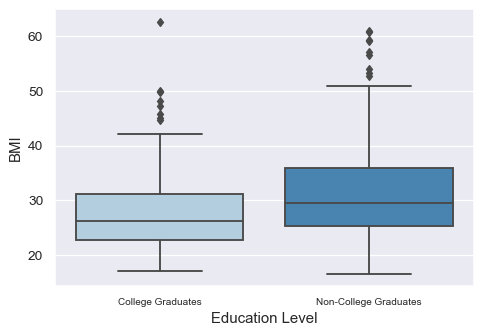

In [216]:
# Women in 30-40 in the survey do not have any missing values, no need to clean
w3040_college_grads_bmi = w3040[w3040['DMDEDUC2'] == 5]['BMXBMI']
w3040_not_college_grads_bmi = w3040[w3040['DMDEDUC2'] != 5]['BMXBMI']

sns.boxplot([w3040_college_grads_bmi, w3040_not_college_grads_bmi], palette = 'Blues')
plt.xticks([0, 1], ['College Graduates', 'Non-College Graduates'], size = 8)
plt.xlabel('Education Level')
plt.ylabel('BMI');

>In the boxplot distribution, there is a noticeable difference in the BMI distribution between college graduates and non-college graduates in women aged 30 to 40. The median BMI for college graduates is around 25, indicating a lower average BMI compared to non-college graduates, whose median BMI is around 30. The range of BMI values for college graduates is from 18 to 42, while for non-college graduates, it is significantly wider, ranging from 18 to over 50.
>
>The interquartile range (IQR) provides a measure of the spread of the BMI values within each group. For college graduates, the IQR is relatively smaller, ranging from 23 to 32, suggesting a more concentrated distribution of BMI values. On the other hand, non-college graduates have a wider IQR, ranging from 26 to 36, indicating a greater variability in BMI.
>
>It is worth noting that both groups have a few outliers beyond the maximum range, totaling around 10 points. These outliers represent BMI values that are significantly higher than the majority of the data points.
>
>Overall, the boxplot analysis suggests that there is a substantial difference in the BMI distribution between college graduates and non-college graduates in women aged 30 to 40, with college graduates tending to have lower BMI values on average.

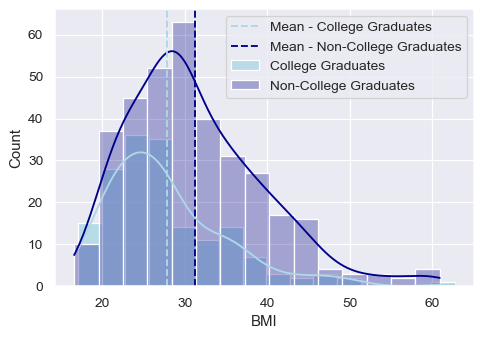

In [221]:
# Add a histogram for each subpopulation
sns.histplot(w3040_college_grads_bmi, color='lightblue', alpha=0.8, label='College Graduates', kde=True)
sns.histplot(w3040_not_college_grads_bmi, color='darkblue', alpha=0.3, label='Non-College Graduates',kde=True)
plt.xlabel('BMI')
plt.axvline(w3040_college_grads_bmi.mean(), color='lightblue', linestyle='dashed', linewidth=1.5, label='Mean - College Graduates')
plt.axvline(w3040_not_college_grads_bmi.mean(), color='darkblue', linestyle='dashed', linewidth=1.5, label='Mean - Non-College Graduates')
plt.legend();

> The histogram reveals that the BMI distribution for both college graduates and non-college graduates in women aged 30-40 is right-skewed. The majority of college graduates have BMI values concentrated between 20 and 30, whereas non-college graduates exhibit a higher concentration between 25 and 35. This suggests that the most frequent BMI values differ between the two groups.
>
> The right-skewed shape of the histogram indicates that there is a longer tail on the right side, suggesting that there are relatively more individuals with higher BMI values in both groups
>
> College graduates have a relatively narrower distribution, with less variability compared to non-college graduates, whose distribution is broader, indicating a greater range of BMI values.

In [224]:
var_college_grads = np.var(w3040_college_grads_bmi)
var_not_college_grads = np.var(w3040_not_college_grads_bmi)

n1 = len(w3040_college_grads_bmi)
n2 = len(w3040_not_college_grads_bmi)

# Print the estimated variances
print("Estimated Variance - College Graduates:", var_college_grads)
print("Estimated Variance - Non-College Graduates:", var_not_college_grads)


Estimated Variance - College Graduates: 53.82741835094558
Estimated Variance - Non-College Graduates: 67.97035566088928


> This indicates that there is greater variability in BMI among non-college graduates compared to college graduates in the given age group. The larger estimated variance suggests a wider range of BMI values and potentially more diverse body compositions among non-college graduates.

####  Pooled and Unpooled estimates of the standard error for the difference between the mean BMI in the two groups

In [231]:
# Assuming both distributions have the same variances
pooled_se = np.sqrt((var_college_grads + var_not_college_grads)/2*(1/n1 + 1/n2))

# Assuming both distributions have the different variances
unpooled_se = np.sqrt(var_college_grads/n1 + var_not_college_grads/n2)

pooled_se, unpooled_se

(0.7211811328673547, 0.7065509944017663)

#### test the null hypothesis that the two population means are equal, using each of the two different standard errors

In [232]:
mean_diff = w3040_college_grads_bmi.mean() - w3040_not_college_grads_bmi.mean()

# Test Statistic
pooled_t_stat = mean_diff/pooled_se
unpooled_t_stat = mean_diff/unpooled_se

# Degrees of freedom
dof = n1 + n2 - 2

# P-values
p_value_pooled = 2 * (1 - stats.t.cdf(abs(pooled_t_stat), dof))
p_value_unpooled = 2 * (1 - stats.t.cdf(abs(unpooled_t_stat), dof))

# Print the p-values
print("Pooled t-test p-value:", p_value_pooled)
print("Unpooled t-test p-value:", p_value_unpooled)

Pooled t-test p-value: 2.2452324122124168e-06
Unpooled t-test p-value: 1.3941692331709277e-06


__Q4a.__ Comment on the strength of evidence against the null hypothesis that these two populations have equal mean BMI.

>The p-values for both the pooled t-test and the unpooled t-test are very small. This indicates strong evidence against the null hypothesis that these two populations have equal mean BMI. In other words, there is a significant difference in mean BMI between college graduates and non-college graduates in women aged 30-40. 

__Q4b.__ Comment on the degree to which the two populations have different variances, and on the extent to which the results using different approaches to estimating the standard error of the mean difference give divergent results.

>The results suggest that the two populations, college graduates and non-college graduates in women aged 30-40, have different variances. This is supported by the calculation of the estimated variances within each group, which yielded values of 53.83 for college graduates and 67.97 for non-college graduates.
>
>The divergent results obtained using the pooled and unpooled t-tests indicate that there may indeed be a difference in variances between the two populations. The pooled t-test assumes equal variances, which may not be an accurate assumption in this case. The unpooled t-test, which considers the possibility of different variances, may provide a more reliable estimate of the standard error of the mean difference.



## Question 5

Conduct a test of the null hypothesis that the first and second diastolic blood pressure measurements (BPXSY1 and BPXSY2) within a subject have the same mean values.

**Step 1: Define hypothesis**
- Population: NHANES samples
- Parameter of Interest: Mean difference in diastolic blood pressure measurements between the first and second measurements (BPXSY1 and BPXSY2) within a subject.
- H0: The mean difference in diastolic blood pressure measurements is zero (no difference).
- Ha: The mean difference in diastolic blood pressure measurements is not zero (there is a difference).

**Step 2: Inference Approach**
- Perform a paired t-test to test the hypothesis because we are comparing the means of two related groups (paired observations).

**Step 3: Check Assumptions**
- Normal distribution of the differences: The differences between the first and second diastolic blood pressure measurements should follow a roughly normal distribution. This assumption can be assessed visually using a histogram or quantitatively using statistical tests.
- Paired observations: The first and second measurements should be paired within each subject, meaning that the measurements come from the same individual. This ensures that the observations are dependent.
- Independence: The paired observations should be independent of each other, meaning that the measurements from one subject should not influence the measurements from another subject.

In [ ]:
# Select valid pairs of measurements (remove missing values)
valid_pairs = da[['BPXSY1', 'BPXSY2']].dropna()

# Extract the two arrays for paired t-test
bp1 = valid_pairs['BPXSY1']
bp2 = valid_pairs['BPXSY2']

#### Normal calculation

In [265]:
# Calculate the differences between paired observations
diff = bp1 - bp2

# Calculate the mean of the differences
mean_diff = np.mean(diff)

# Calculate the standard deviation of the differences
std_dev_diff = np.std(diff)

# Calculate the standard error 
se = std_dev_diff / np.sqrt(len(diff))

# Calculate the t-statistic
t_stat = mean_diff / se

# Calculate the p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), len(valid_pairs) - 1))

# Print the results
print("Paired t-test results:")
print("t-statistic:", t_stat)
print("p-value:", p_value)

Paired t-test results:
t-statistic: 9.801547258772144
p-value: 0.0


#### Using ttest_rel from scipy.stats

In [261]:
# Perform paired t-test
t_stat, p_value = stats.ttest_rel(bp1, bp2)

# Print the results
print("Paired t-test results:")
print("t-statistic:", t_stat)
print("p-value:", p_value)

Paired t-test results:
t-statistic: 9.800634425497911
p-value: 1.725831549753543e-22


#### Using ttest_1samp from scipy.stats

In [262]:
# Perform one-sample t-test on the differences
t_stat, p_value = stats.ttest_1samp(diff, 0)

# Print the results
print("Paired t-test results:")
print("t-statistic:", t_stat)
print("p-value:", p_value)

Paired t-test results:
t-statistic: 9.800634425497911
p-value: 1.725831549753543e-22


__Q5a.__ Briefly describe your findings for an audience that is not familiar with statistical hypothesis testing.

>In this analysis, we investigated whether the first and second diastolic blood pressure measurements within a subject have the same mean values. To determine this, we conducted a paired t-test, which is a statistical test used to compare the means of two related samples.
>
>Our findings indicate that there is strong evidence to suggest that the first and second diastolic blood pressure measurements have different mean values within the subject. The t-statistic, which measures the difference between the means relative to the variability within the subject, was found to be significantly large.
>
>Additionally, the p-value, which represents the probability of obtaining such extreme results if the null hypothesis of equal means were true, was extremely small ~0. This indicates that the observed differences in the mean values are highly unlikely to have occurred by chance alone.
>
>Based on these findings, we can conclude that there are significant differences between the first and second diastolic blood pressure measurements within a subject. This suggests that there may be changes in diastolic blood pressure over time or due to other factors within individuals.

__Q5b.__ Pretend that the first and second diastolic blood pressure measurements were taken on different people.  Modfify the analysis above as appropriate for this setting.

#### No more paired data

In [272]:
# Assuming bp1 and bp2 are the two independent samples

# Calculate the standard deviations of the two samples
std_bp1 = bp1.std()
std_bp2 = bp2.std()

# Calculate the sample sizes of the two samples
n1 = len(bp1)
n2 = len(bp2)
dof = n1 + n2 - 2

# Calculate the pooled standard deviation
pooled_std_dev = np.sqrt(((n1 - 1) * std_bp1**2 + (n2 - 1) * std_bp2**2) / dof)

# Calculate the standard error of the mean difference (pooled)
se_pooled = pooled_std_dev * np.sqrt(1/n1 + 1/n2)

# Calculate the t-statistic
t_stat_pooled = (mean_bp1 - mean_bp2) / se_pooled

# Calculate the p-value (pooled)
p_value_pooled = 2 * (1 - stats.t.cdf(np.abs(t_stat_pooled), dof))

# Print the results (pooled)
print("Pooled t-test results:")
print("t-statistic:", t_stat_pooled)
print("p-value:", p_value_pooled)

Pooled t-test results:
t-statistic: 1.9065526348810595
p-value: 0.0566052136496753


In [271]:
# Calculate the standard error of the mean difference (unpooled)
se_unpooled = np.sqrt((std_dev_bp1**2 / n1) + (std_dev_bp2**2 / n2))

# Calculate the t-statistic
t_stat_unpooled = (mean_bp1 - mean_bp2) / se_unpooled

# Calculate the degrees of freedom
df_unpooled = min(n1 - 1, n2 - 1)

# Calculate the p-value (unpooled)
p_value_unpooled = 2 * (1 - stats.t.cdf(np.abs(t_stat_unpooled), df_unpooled))

# Print the results (unpooled)
print("Unpooled t-test results:")
print("t-statistic:", t_stat_unpooled)
print("p-value:", p_value_unpooled)

Unpooled t-test results:
t-statistic: 1.9067302116182663
p-value: 0.05660886880759963


__Q5c.__ Briefly describe how the approaches used and the results obtained in the preceeding two parts of the question differ.

>In the preceding two parts of the question, we performed a paired t-test assuming that the first and second diastolic blood pressure measurements were taken on the same individuals (paired observations). However, in this new scenario, we are treating the first and second measurements as independent samples taken from different individuals.
>
>The approaches used in the two parts differ in the calculation of the standard error of the mean difference. In the paired t-test, we calculated the standard deviation of the differences between the paired observations and divided it by the square root of the sample size. In the independent samples t-test, we calculated the standard errors separately for each sample using their respective standard deviations and sample sizes.
>
>The results obtained from the two approaches are likely to differ because the assumptions made in each analysis are different. The paired t-test accounts for the correlation between the paired observations and is appropriate when comparing the means of two related measurements within the same individuals. On the other hand, the independent samples t-test assumes that the measurements are independent and is suitable for comparing the means of two separate groups.